# 1.) Import the Credit Card Fraud Data From CCLE

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [5]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [8]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [9]:
df_select

,trans_date_trans_time,category,amt,city_pop,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,333497,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0
4,2020-06-21 12:15:17,travel,3.19,1126,0
...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519,0
555715,2020-12-31 23:59:09,kids_pets,111.84,28739,0
555716,2020-12-31 23:59:15,kids_pets,86.88,3684,0
555717,2020-12-31 23:59:24,travel,7.99,129,0


# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [10]:
df_select["trans_date_trans_time"][0]

'2020-06-21 12:14:25'

In [11]:
type(df_select["trans_date_trans_time"][0])

str

In [12]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-12-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [13]:
dir(df_select["trans_date_trans_time"][0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_

In [14]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-14-fa4370ef92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [15]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [16]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# XXX SKIP THIS WE WILL TALK ABOUT NEXT CLASS

In [17]:
resample_X = X
resample_y = y

In [18]:
resample_X

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,28739,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,3684,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,129,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
resample_y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

# 5.) Train a Logistic regression.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(resample_X)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
#train logistic regression model
log_reg = LogisticRegression().fit(X_normalized, resample_y)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [19]:
# ASK chatgpt
# If you dont like the code ask in a different way


Threshold: 0.009713456165780903


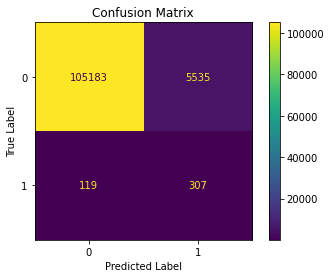

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, resample_y, test_size=0.2, random_state=42)

# Get the predictions and predicted probabilities for the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Sort the instances by predicted probability in descending order
y_pred_proba_sorted, y_test_sorted = zip(*sorted(zip(y_pred_proba, y_test), reverse=True))

# Initialize the number of false positives and negatives
fp, tn = 0, sum(y_test == 0)

# Iterate through the instances and calculate the FPR
for i, y in enumerate(y_test_sorted):
    if y == 0:
        fp += 1
    fpr = fp / tn
    if fpr > 0.05:
        threshold = y_pred_proba_sorted[i]
        break

# Print the threshold value
print("Threshold:", threshold)

# Classify instances as positive if their probability is greater than the threshold
y_pred_threshold = [1 if p > threshold else 0 for p in y_pred_proba]

# Calculate the confusion matrix to check the results
cm = confusion_matrix(y_test, y_pred_threshold)

#Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [26]:
df_temp = df_select.copy()

In [27]:
df_temp["pred"] = log_reg.predict(resample_X)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [28]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]

In [39]:
df_temp

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19
...,...,...,...
555714,0,0,43.77
555715,0,0,111.84
555716,0,0,86.88
555717,0,0,7.99


pred=0, is_fraud=0 -> the company makes 0.02 * amt

pred=1, is_fraud=0 -> the company does not make or lose any money

pred=0, is_fraud=1 -> the company loses -amt

pred=1, is_fraud=1 -> the company does not make or lose any money

In [51]:
df_profit = df_temp.groupby(['pred','is_fraud']).sum()
df_profit

amt
pred is_fraud             
0    0         31960484.96
     1           674342.14
1    0          5469093.47
     1           458982.54

In [52]:
31960484.96*0.02 - 674342.14 

-35132.44079999998

Company loses $\$35132.44$. If I was a consultant, I will need to predict fraud more often because if pred=1 and is_fraud=1 or 0 then the company does not make or lose any money. In this case, I want to identify more false positives.

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [56]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model_fit = lasso_model.fit(X_train, y_train)

In [ ]:
# If most or all your variables go to 0 => Your data is garbage
# The regularization will tell us if our model has significance
# This of using coefficient strength similar to r^2

In [59]:
lasso_model_fit.coef_

array([[ 0.33329261, -0.11627223,  0.0066688 , -0.08477376, -0.07565801,
         0.09606435,  0.02305562,  0.42846903, -0.05325621, -0.12252849,
        -0.08305765,  0.30767027, -0.01679893,  0.        ,  0.38949583,
         0.07331496, -0.84541095]])

Only one of variables goes to 0, so the selected features can be used in a prediction model.